### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### Описание данных

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Оглавление

#### [1. Открытие файла с данными и изучение общей информации](#step1)

   [1.1. Чтение файла и просмотр общей информации о датасете](#step1.1)
    
   [1.2. Вывод и постановка задач на предобработку](#step1.2)
    
#### [2. Предобработка данных](#step2)

   [2.1 Приведение названия столбцов к нижнему регистру](#step2.1)
   
   [2.2 Обработка пропущенных значений](#step2.2)
   
   [2.3 Изменение типа данных](#step2.3)
   
   [2.4 Расчет суммарных продаж во всех регионах для каждой игры и добавление данных в рабочую таблицу](#step2.4)
   
   [2.5 Итоги](#step2.5)
   
#### [3. Анализ данных](#step3)
   
   [3.1 Сколько игр выпускалось в разные годы?](#step3.1)
   
   [3.2 Как менялись продажи по платформам](#step3.2)
   
   [3.3 Анализ в актуальном периоде](#step3.3)
   
   [3.4 Влияние отзывов на продажи](#step3.4)
   
   [3.5 Распределение игр по жанрам](#step3.5)
     
#### [4. Составление портрета пользователя каждого региона](#step4)
   
   [4.1 Самые популярные платформы (топ-5). Описание различия в долях продаж для каждого региона](#step4.1)
   
   [4.2 Самые популярные жанры (топ-5). Пояснить разницу для каждого региона](#step4.2)
   
   [4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#step4.3)
   
#### [5. Проверка гипотез](#step5)

   [5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#step5.1)
   
   [5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные](#step5.2)
   
#### [6. Общие выводы](#step6)  


### 1. Открытие файла с данными и изучение общей информации<a id="step1"></a> 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

#### 1.1 Чтение файла и просмотр общей информации о датасете<a id="step1.1"></a> 

In [4]:
games = pd.read_csv('/datasets/games.csv', sep=',')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В 6 столбцах есть пропущенные значения. Нужно будет посмотреть их подробнее и понять, что с ними делать. Сейчас посмотрю процент кол-ва пропусков от общего числа строк по каждому столбцу

In [5]:
for column in games:
    a = games[column].isnull().sum()/games[column].shape[0]*100
    a = a.round(2)
    if a > 0:
        print('{: <20}'.format(column), '{: >10}'.format(a))

Name                       0.01
Year_of_Release            1.61
Genre                      0.01
Critic_Score              51.32
User_Score                40.09
Rating                    40.48


Теперь взгляну на 15 случайных строк таблицы

In [6]:
games.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
12748,Samurai Jack: The Shadow of Aku,PS2,2004.0,Action,0.03,0.02,0.00,0.01,59.0,8.4,T
215,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,0.00,0.00,4.87,0.00,NaN,NaN,NaN
12049,Crayon Shin-Chan: Obaka Daininden - Susume! Ka...,DS,2010.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
16436,Grooverider: Slot Car Thunder,GC,2003.0,Racing,0.01,0.00,0.00,0.00,49.0,tbd,E
5132,NFL Street 2 Unleashed,PSP,2005.0,Sports,0.34,0.00,0.00,0.03,73.0,7.4,E
14330,Medarot 9: Kabuto Ver. / Kuwagata Ver.,3DS,2015.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
7160,NCAA Football 2005,GC,2004.0,Sports,0.17,0.04,0.00,0.01,88.0,9,E
8679,Yu-Gi-Oh! 5D's: Duel Transer,Wii,2010.0,Strategy,0.11,0.02,0.02,0.01,NaN,NaN,NaN
13269,Kekkon Zenya,SAT,1995.0,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN
2604,Band Hero,X360,2009.0,Misc,0.51,0.21,0.00,0.07,76.0,5,E10+


И выведу список названий столбцов

In [7]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

#### 1.2. Вывод и постановка задач на предобработку<a id="step1.2"></a> 

Итак, представлены данные о компьютерных играх в виде таблицы из 11 столбцов и 16715 строк. В 6 столбцах есть пропущенные значения, при этом в столбцах с данными о рейтинге их очень много (40-50% от общего числа строк). Есть некорректные типы данных. Названия столбцов записаны в разных регистрах. По итогу в предобработке предстоит сделать следующее:

1. Привести названия столбцов к нижнему регистру

2. Обработать пропуски в столбцах с названием, годом выпуска, жанром и всеми оценками

3. Изменить тип данных в столбце с годом выпуска с float на int, в столбце с оценкой пользователя возможно на float, предварительно проверив нет ли там действительно строковых записей

4. Посчитать суммарные продажи во всех регионах для каждой игры и добавить данные в рабочую таблицу

### 2. Предобработка данных<a id="step2"></a> 

#### 2.1 Приведение названия столбцов к нижнему регистру<a id="step2.1"></a> 

In [8]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь все столбцы названы красиво и удобно

#### 2.2 Обработка пропущенных значений<a id="step2.2"></a> 

В столбце с названием игры пропущено 0,01%, совсем немного, посмотрю на эти строки подробно. Для этого сначала заменю пропуски на None и выведу с ним строки.

До замены на None проверю, нет ли игр с таким именем

In [9]:
print('Количество игр с именем None = {}'.format(games['name'][games['name'] == 'None'].count()))

Количество игр с именем None = 0


Можно делать замену

In [10]:
games['name'] = games['name'].fillna('None')

Проверю, что получилось

In [11]:
games[games['name'] == 'None']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,None,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,None,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Всего 2 строки. Несмотря на то, что имя не было указано, есть инфо о дате выпуска и платформе, а также о продажах. Игры довольно старые - 1993 года выпуска, возможно данные были утеряны, так как неизвестно каким образом они были собраны. Поэтому пока оставлю эти строки с именем None.

В столбце с жанром также малое количество пропусков - 0,01% от общего числа строк. Сделаю аналогичные манипуляции, что и со столбцом с именем

In [12]:
print('Количество игр с жанром None = {}'.format(games['genre'][games['genre'] == 'None'].count()))

Количество игр с жанром None = 0


In [13]:
games['genre'] = games['genre'].fillna('None')

In [14]:
games[games['genre'] == 'None']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,None,GEN,1993.0,None,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,None,GEN,1993.0,None,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это те же строки). Оставлю так, заменить больше нечем, даже нет названия, поэтому определить жанр невозможно.

В столбце с годом выпуска 1,61% пропущенных значений от общего числа строк. Это важные данные для решения поставленной задачи, без них никак. Данных для замены нет, поэтому буду удалять эти строки.

In [15]:
print('Количество строк без года выпуска до обработки = {}'.format(games['year_of_release'].isnull().sum()))
print('Количество строк c годом выпуска до обработки = {}'.format(games.shape[0] - games['year_of_release'].isnull().sum()))
print('Количество строк всего = {}'.format(games.shape[0]))

Количество строк без года выпуска до обработки = 269
Количество строк c годом выпуска до обработки = 16446
Количество строк всего = 16715


In [16]:
games = games.dropna(subset = ['year_of_release'])
print('Количество строк без года выпуска после обработки = {}'.format(games['year_of_release'].isnull().sum()))
print('Количество строк c годом выпуска до обработки = {}'.format(games.shape[0] - games['year_of_release'].isnull().sum()))
print('Количество строк всего = {}'.format(games.shape[0]))

Количество строк без года выпуска после обработки = 0
Количество строк c годом выпуска до обработки = 16446
Количество строк всего = 16446


Удаление прошло успешно. Теперь обработаю пропуски в столбцах с оценками. Здесь вероятно пропуски образованы по причине того, что игры в принципе не оценивались критиками, пользователями или ESRB. Возможно для каких-то игр и организации ESRB еще не существовало. Удалять такие строки нельзя, это больше половины данных, поэтому сделаю замену числовых рейтингов на -1, предварительно посмотрю какие вообще рейтинги есть в данных. С рейтингом от ESRB разберусь чуть ниже, там текстовые значения, замена на -1 будет некорректна.

In [17]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

В оценках критиков отрицательных значений нет, да и не целых нет, поэтому позже еще произведу смену типа данных на целочисленный. Итак, делаю замену пропусков на -1.

In [18]:
print('Количество строк без оценки критика = {}'.format(games['critic_score'].isnull().sum()))
print('Количество строк c оценкой критика = {}'.format(games.shape[0] - games['critic_score'].isnull().sum()))
print('Количество строк всего = {}'.format(games.shape[0]))

Количество строк без оценки критика = 8463
Количество строк c оценкой критика = 7983
Количество строк всего = 16446


In [19]:
games['critic_score'] = games['critic_score'].fillna(-1)
print('Количество строк без оценки критика = {}'.format(games['critic_score'].isnull().sum()))
print('Количество строк c оценкой критика -1 = {}'.format(games['critic_score'][games['critic_score'] == -1].count()))
print('Количество строк всего = {}'.format(games.shape[0]))

Количество строк без оценки критика = 0
Количество строк c оценкой критика -1 = 8463
Количество строк всего = 16446


Успешно заменилось. Теперь посмотрю на оценки пользователей.

In [20]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пропусков, встречаются значения 'tbd'. Запросив у сторонних источничков, что это за аббревиатура, узнала, что это To Be Determined, то есть "Будет определено", а значит сейчас не определено, то есть по сути это тот же пропуск. В таком случае все пропуски и 'tbd' заменю на -1. И позже сменю тип данных на float.

In [21]:
print('Количество строк без оценки пользователя = {}'.format(games['user_score'].isnull().sum() + games['user_score'][games['user_score'] == 'tbd'].count()))
print('Количество строк c оценкой пользователя = {}'.format(games.shape[0] - games['user_score'].isnull().sum() - games['user_score'][games['user_score'] == 'tbd'].count()))
print('Количество строк всего = {}'.format(games.shape[0]))

Количество строк без оценки пользователя = 8983
Количество строк c оценкой пользователя = 7463
Количество строк всего = 16446


In [22]:
games['user_score'] = games['user_score'].fillna(-1)
games[games['user_score'] == 'tbd'] = games[games['user_score'] == 'tbd'].replace('tbd', -1)

In [23]:
print('Количество строк без оценки пользователя = {}'.format(games['user_score'].isnull().sum() + games['user_score'][games['user_score'] == 'tbd'].count()))
print('Количество строк c оценкой пользователя -1 = {}'.format(games['user_score'][games['user_score'] == -1].count()))
print('Количество строк всего = {}'.format(games.shape[0]))

Количество строк без оценки пользователя = 0
Количество строк c оценкой пользователя -1 = 8983
Количество строк всего = 16446


Успешно заменилось, теперь обработаю пропуски в столбце с рейтингом от ESRB

In [24]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Здесь замена на -1 будет некорректной, поэтому заменю на 'NA'

In [25]:
print('Количество строк без рейтинга от ESRB = {}'.format(games['rating'].isnull().sum()))
print('Количество строк c рейтингом от ESRB = {}'.format(games.shape[0] - games['rating'].isnull().sum()))
print('Количество строк всего = {}'.format(games.shape[0]))

Количество строк без рейтинга от ESRB = 6678
Количество строк c рейтингом от ESRB = 9768
Количество строк всего = 16446


In [26]:
games['rating'] = games['rating'].fillna('NA')

In [27]:
print('Количество строк без рейтинга от ESRB = {}'.format(games['rating'].isnull().sum()))
print('Количество строк c рейтингом "NA" от ESRB  = {}'.format(games['rating'][games['rating'] == 'NA'].count()))
print('Количество строк всего = {}'.format(games.shape[0]))

Количество строк без рейтинга от ESRB = 0
Количество строк c рейтингом "NA" от ESRB  = 6678
Количество строк всего = 16446


Все пропуски обработы. Взгляну на инфо о  преобразованной таблице

In [28]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16446 non-null object
platform           16446 non-null object
year_of_release    16446 non-null float64
genre              16446 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       16446 non-null float64
user_score         16446 non-null object
rating             16446 non-null object
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Теперь можно переходить к обработке типов данных

#### 2.3 Изменение типа данных<a id="step2.3"></a> 

Сменю тип данных в столбце с годом выпуска с вещественного на целочисленный

In [29]:
games['year_of_release'] = games['year_of_release'].astype('int')

Сменю тип данных в столбце с оценкой критиков со строкового на числовой

In [30]:
games['critic_score'] = games['critic_score'].astype('int')
games['user_score'] = games['user_score'].astype('float')

Посмотрю, что получилось

In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16446 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16446 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       16446 non-null int64
user_score         16446 non-null float64
rating             16446 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Теперь все типы данных корректные

#### 2.4 Расчет суммарных продаж во всех регионах для каждой игры и добавление данных в рабочую таблицу<a id="step2.4"></a> 

In [32]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NA,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NA,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,NA,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,NA,28.31


#### 2.5 Итоги<a id="step2.5"></a> 

Во втором разделе мною была проделана предобработка данных. Заменены типы данных на корректные в 3 столбцах. Преобразованы названия столбцов к записи с одним регистром. Удалены строки с пропущенными значениями года выпуска (всего 269 строк, что составило 1,61% от общего числа). Все пропущенные значения в рейтингах заменены на условное значение, обозначающее отстутствие данных, тем самым сохранены данные других столбцов. Также произведен подсчет суммарных продаж по всем регионам и добавлен к имеющимся данным.

### 3. Анализ данных<a id="step3"></a> 

#### 3.1 Сколько игр выпускалось в разные годы?<a id="step3.1"></a> 

In [33]:
games_sum_year = games.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count')
games_sum_year.reset_index(level=0, inplace=True)
games_sum_year.columns = ['год выпуска','кол-во игр']
games_sum_year.head()

,год выпуска,кол-во игр
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


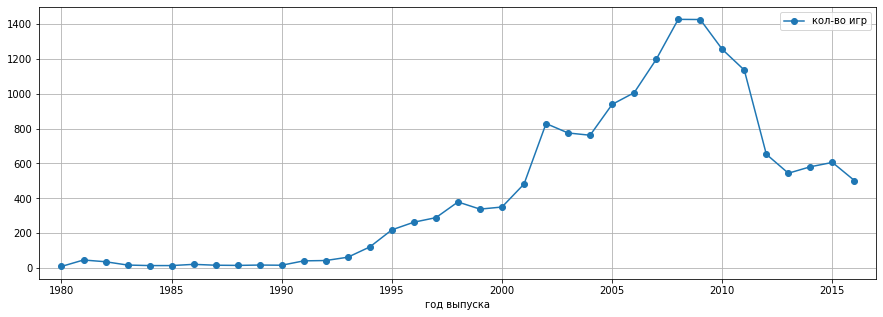

In [34]:
games_sum_year.plot(x='год выпуска', y='кол-во игр', style='o-', figsize=(15,5), xlim=(1979, 2017), grid=True)

Получился достаточно наглядный график развития индустрии игр. Отчетливо видно, что до 1995 года игр почти не было. Далее происходит плавный рост и начиная с 2002 года резко увеличивается количество выпущенных игр. Пик приходится на 2007 и 2008 года. Далее начинается спад, это говорит о снижении интереса у людей к играм. Соответственно при уменьшении спроса уменьшается и количество предложений.

#### 3.2 Как менялись продажи по платформам?<a id="step3.2"></a> 

In [35]:
games_sum_platform = games.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
games_sum_platform.reset_index(level=0, inplace=True)
games_sum_platform = games_sum_platform.sort_values(by = 'total_sales', ascending = False)
games_sum_platform.columns = ['платформа','продажи, млн']
games_sum_platform.head(10)

,платформа,"продажи, млн"
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


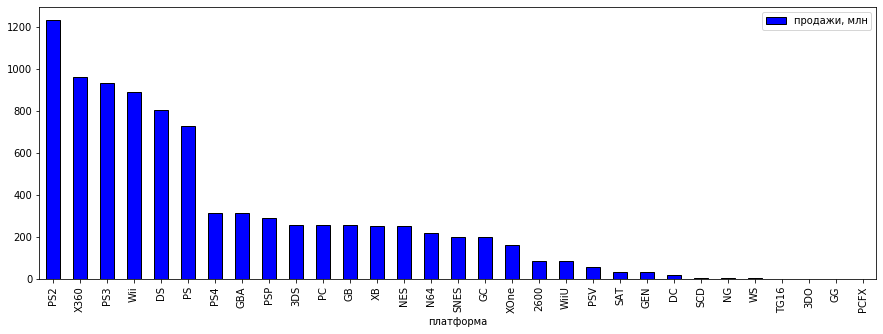

In [36]:
games_sum_platform.plot(x='платформа', y='продажи, млн', kind='bar', figsize=(15,5), color='blue', ec='black')

Топ-6 платформ по продажам - PS2, X360, PS3, Wii, DS, PS. Теперь можно посмотреть, как развивались эти платформы с течением времени.

Сначала нужно подготовить данные, по которым буду строить графики. Мне нужно 6 таблиц для каждой платформы из топ-6. Напишу функцию, которая будет формировать таблицу для выбранной платформы с данными о продажах по годам. 

In [37]:
def platform_years(data, platforma):
    data_platforma = data[data['platform'] == platforma]
    data_platforma = data_platforma.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc='sum')
    data_platforma.reset_index(level=0, inplace=True)
    data_platforma.columns = ['год выпуска','продажи, млн']
    return data_platforma

С помощью написанной функции получу 6 таблиц и сохраню их

In [38]:
data_1 = platform_years(games, 'PS2')
data_2 = platform_years(games, 'X360')
data_3 = platform_years(games, 'PS3')
data_4 = platform_years(games, 'Wii')
data_5 = platform_years(games, 'DS')
data_6 = platform_years(games, 'PS')

Построю 6 графиков в одном окне, используя параметр ax.

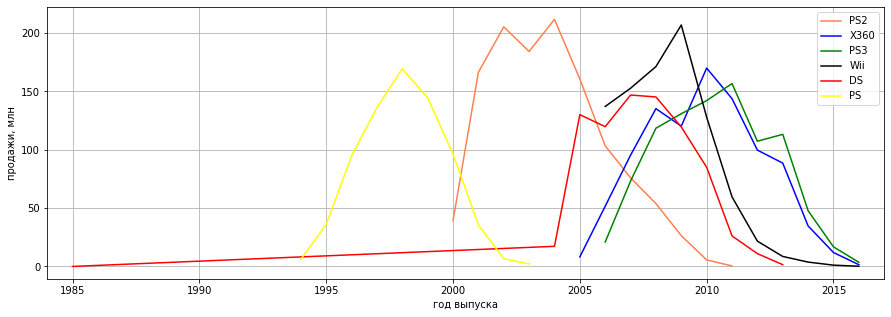

In [39]:
ax = data_1.plot(x='год выпуска', y='продажи, млн', color='coral', figsize=(15,5), xlim=(1984, 2017), grid=True)
bx = data_2.plot(x='год выпуска', y='продажи, млн', color='blue', ax=ax, figsize=(15,5), xlim=(1984, 2017), grid=True)
cx = data_3.plot(x='год выпуска', y='продажи, млн', color='green', ax=bx, figsize=(15,5), xlim=(1984, 2017), grid=True)
dx = data_4.plot(x='год выпуска', y='продажи, млн', color='black', ax=cx, figsize=(15,5), xlim=(1984, 2017), grid=True)
ex = data_5.plot(x='год выпуска', y='продажи, млн', color='red', ax=dx, figsize=(15,5), xlim=(1984, 2017), grid=True)
data_6.plot(x='год выпуска', y='продажи, млн', color='yellow', ax=ex, figsize=(15,5), xlim=(1984, 2017), grid=True)
plt.ylabel('продажи, млн')
plt.legend(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], prop={'size':10})

Получился довольно интересный факт и закономерность. Каждая платформа живет около 10-11 лет. Логичная история развития линейки PS: PS - 1994-2003 года, PS2 - 2000-2011 года, PS3 - с 2006-2016. То есть, когда запускается новая версия, предыдущая идет на спад и "умирает". Wii - 2006-2016 года, X360 - 2005-2016, DS реальное развитие начал с 2004 года, завершил в 2013 году. Для посторения прогноза на 2017 год бессмысленно брать актуальный период во все 10 лет жизни платформы. Пиковые значения продаж приходятся примерно на 2-4 года у каждой платформы, после чего начинают угасать. Так у PS3, например, это 2008-2011 года, у PS2 - 2002-2004 года. Таким образом актуальным периодом для прогноза на 2017 год возьму 4 предшествующих года 2013-2016 года.

#### 3.3 Анализ в актуальном периоде<a id="step3.3"></a> 

Сделаю срез по данным за актуальный период. Сохраню в новый датафрейм

In [40]:
games_actual = games.query('year_of_release <= 2016 & year_of_release >= 2013')

Выведу названия платформ, которые попадают в этот период.

In [41]:
games_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

Воспользуюсь написанной выше функцией platform_years для формирования данных для дальнейшего построения графиков

In [42]:
data_1 = platform_years(games_actual, 'PS3')
data_2 = platform_years(games_actual, 'X360')
data_3 = platform_years(games_actual, 'PS4')
data_4 = platform_years(games_actual, '3DS')
data_5 = platform_years(games_actual, 'XOne')
data_6 = platform_years(games_actual, 'WiiU')
data_7 = platform_years(games_actual, 'Wii')
data_8 = platform_years(games_actual, 'PC')
data_9 = platform_years(games_actual, 'PSV')
data_10 = platform_years(games_actual, 'DS')
data_11 = platform_years(games_actual, 'PSP')

Построю графики изменения продаж по всем платформам в актуальном периоде.

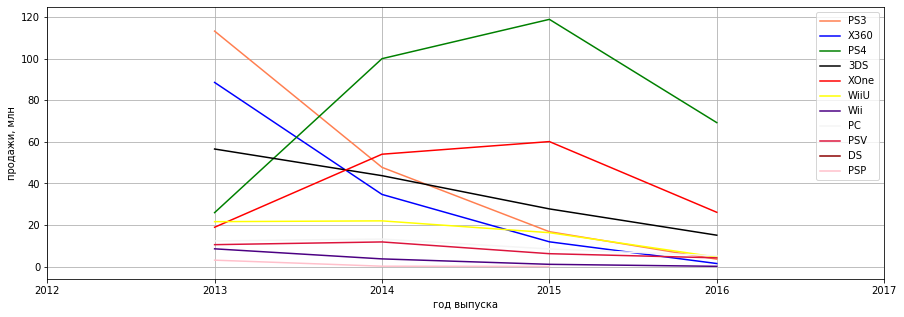

In [43]:
ax = data_1.plot(x='год выпуска', y='продажи, млн', color='coral', figsize=(15,5), xlim=(2012, 2017), grid=True)
bx = data_2.plot(x='год выпуска', y='продажи, млн', color='blue', ax=ax, figsize=(15,5), xlim=(2012, 2017), grid=True)
cx = data_3.plot(x='год выпуска', y='продажи, млн', color='green', ax=bx, figsize=(15,5), xlim=(2012, 2017), grid=True)
dx = data_4.plot(x='год выпуска', y='продажи, млн', color='black', ax=cx, figsize=(15,5), xlim=(2012, 2017), grid=True)
ex = data_5.plot(x='год выпуска', y='продажи, млн', color='red', ax=dx, figsize=(15,5), xlim=(2012, 2017), grid=True)
fx = data_6.plot(x='год выпуска', y='продажи, млн', color='yellow', ax=ex, figsize=(15,5), xlim=(2012, 2017), grid=True)
gx = data_7.plot(x='год выпуска', y='продажи, млн', color='indigo', ax=fx, figsize=(15,5), xlim=(2012, 2017), grid=True)
hx = data_8.plot(x='год выпуска', y='продажи, млн', color='whitesmoke', ax=gx, figsize=(15,5), xlim=(2012, 2017), grid=True)
ix = data_9.plot(x='год выпуска', y='продажи, млн', color='crimson', ax=hx, figsize=(15,5), xlim=(2012, 2017), grid=True)
jx = data_10.plot(x='год выпуска', y='продажи, млн', color='darkred', ax=ix, figsize=(15,5), xlim=(2012, 2017), grid=True)
data_11.plot(x='год выпуска', y='продажи, млн', color='pink', ax=jx, figsize=(15,5), xlim=(2012, 2017), grid=True)
plt.ylabel('продажи, млн')
plt.legend(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV', 'DS', 'PSP'], prop={'size':10})

В актуальном периоде только 2 платформы набирают рост по продажам и лидируют - это платфрмы PS4 и XOne. Остальные платформы в этом периоде завершают свою жизнь, об этом говорит стремительное падение уровня продаж. Посмотрю распределение продаж у PS4 и XOne, построив "ящик с усами".

In [44]:
games_actual_PS4 = games_actual.query('platform == "PS4"')
games_actual_XOne = games_actual.query('platform == "XOne"')

Text(0, 0.5, 'продажи')

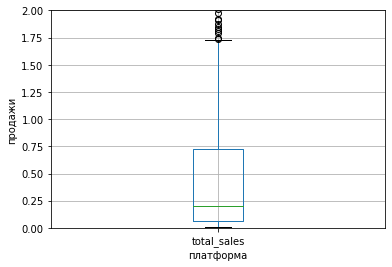

In [45]:
plt.ylim(0, 2)
games_actual_PS4.boxplot('total_sales', figsize=(12,5))
plt.xlabel('платформа')
plt.ylabel('продажи')

#### Платформа PS4:

Выбросы за пределами 1,75 млн долларов. В основном продажи до 750 тыс долларов. Медиана 200 тыс.

Text(0, 0.5, 'продажи')

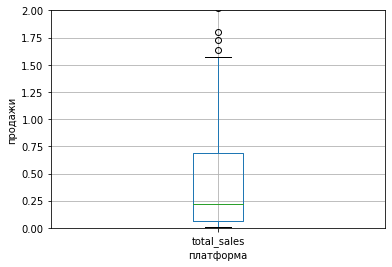

In [46]:
plt.ylim(0, 2)
games_actual_XOne.boxplot('total_sales', figsize=(12,5))
plt.xlabel('платформа')
plt.ylabel('продажи')

#### Платформа XOne:

Выбросы за пределами 1,5 млн долларов. В основном продажи до 750 тыс долларов. Медиана 200 тыс.

Сравнивая две популярные платформы в рассматриваемом актуальном периоде можно сказать, что поведение в продажах схоже.

#### 3.4 Влияние отзывов на продажи<a id="step3.4"></a> 

#### платформа PS4

Посмотрю влияют ли оценки критиков на продажи игр, построю диаграмму рассеяния

Text(0, 0.5, 'продажи')

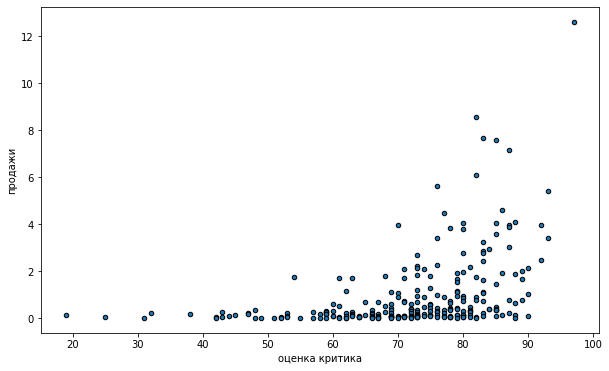

In [45]:
games_actual_PS4_critic = games_actual_PS4.query('critic_score != -1')
games_actual_PS4_critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(10,6))
plt.xlabel('оценка критика')
plt.ylabel('продажи')

In [46]:
print('Коэффициент корреляции между оценкой критика и суммой продаж: {:.2f}'.format(games_actual_PS4_critic['critic_score'].corr(games_actual_PS4_critic['total_sales'])))

Коэффициент корреляции между оценкой критика и суммой продаж: 0.41


С увеличением средней оценки критиков увеличивается и уровень продаж.

Text(0, 0.5, 'продажи')

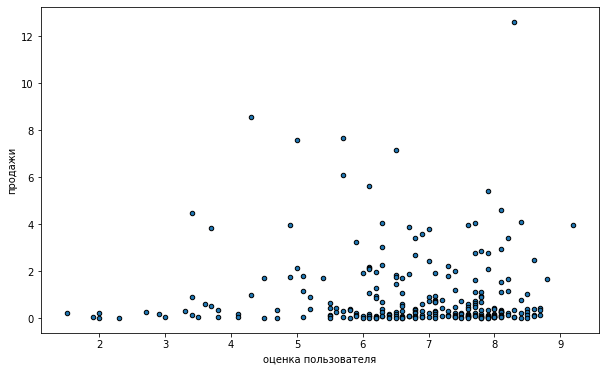

In [47]:
games_actual_PS4_user = games_actual_PS4.query('user_score != -1')
games_actual_PS4_user.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(10,6))
plt.xlabel('оценка пользователя')
plt.ylabel('продажи')

In [48]:
print('Коэффициент корреляции между оценкой пользователя и суммой продаж: {:.2f}'.format(games_actual_PS4_user['user_score'].corr(games_actual_PS4_user['total_sales'])))

Коэффициент корреляции между оценкой пользователя и суммой продаж: -0.03


С оценками пользователей все иначе, зависимости не наблюдается. Хотя на практике так и есть, сначала игра покупается, а после использования оставляется отзыв и оценка, то есть продажа есть, а оценка может быть как высокой, так и низкой.

#### платформа XOne

Text(0, 0.5, 'продажи')

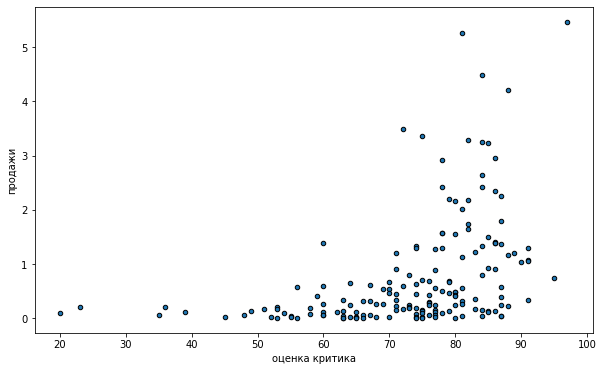

In [49]:
games_actual_XOne_critic = games_actual_XOne.query('critic_score != -1')
games_actual_XOne_critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(10,6))
plt.xlabel('оценка критика')
plt.ylabel('продажи')

In [50]:
print('Коэффициент корреляции между оценкой критика и суммой продаж: {:.2f}'.format(games_actual_XOne_critic['critic_score'].corr(games_actual_XOne_critic['total_sales'])))

Коэффициент корреляции между оценкой критика и суммой продаж: 0.42


Получился аналогичный результат, как и сплатформой PS4. Все-таки оценки критиков имеют небольшой вес в суммах итоговых продаж.

Text(0, 0.5, 'продажи')

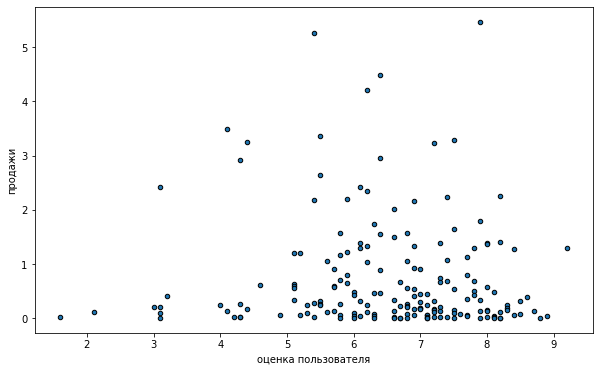

In [51]:
games_actual_XOne_user = games_actual_XOne.query('user_score != -1')
games_actual_XOne_user.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(10,6))
plt.xlabel('оценка пользователя')
plt.ylabel('продажи')

In [52]:
print('Коэффициент корреляции между оценкой пользователя и суммой продаж: {:.2f}'.format(games_actual_XOne_user['user_score'].corr(games_actual_XOne_user['total_sales'])))

Коэффициент корреляции между оценкой пользователя и суммой продаж: -0.07


И снова видим отсутствие зависимости продаж от оценки пользователей.

#### 3.5 Распределение игр по жанрам<a id="step3.5"></a> 

In [53]:
games_sum_genre = games_actual.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum', 'count'])
games_sum_genre.reset_index(level=0, inplace=True)
games_sum_genre.columns = ['жанр','продажи, млн', 'кол-во игр']
games_sum_genre = games_sum_genre.sort_values(by = 'продажи, млн', ascending = False)
games_sum_genre.head(10)

,жанр,"продажи, млн",кол-во игр
0,Action,321.87,766
8,Shooter,232.98,187
10,Sports,150.65,214
7,Role-Playing,145.89,292
3,Misc,62.82,155
4,Platform,42.63,74
6,Racing,39.89,85
2,Fighting,35.31,80
1,Adventure,23.64,245
9,Simulation,21.76,62


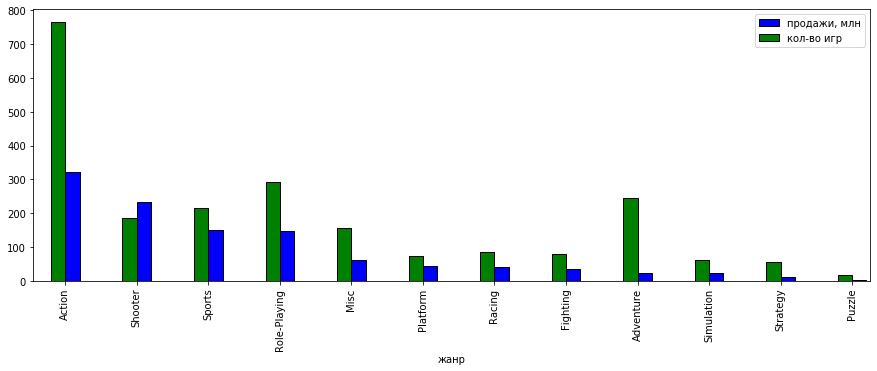

In [54]:
ax = games_sum_genre.plot(x='жанр', y='продажи, млн', kind='bar', figsize=(15,5), color='blue', ec='black', position=0, width=0.2)
games_sum_genre.plot(x='жанр', y='кол-во игр', kind='bar', figsize=(15,5), color='green', ec='black', ax=ax, position=1, width=0.2)

Больше всего игр жанра Action. Суммы продаж по ним тоже наибольшие, логично, это дорогие игры для производства. На втором месте игры жанра Role-Playing, продажи по ним на четвертом месте. У жанра Sports несмотря на то, что кол-во игр заметно меньше по сравнению с Action выручка по ним не сильно отличается от Action. Значит игры жанра Sports в среднем стоят дороже. Самые низкие продажи у жанров Puzzle, Adventure, Strategy, Simulation. По количеству игр жанры Puzzle, Simulation и Strategy также в антитопе.

### 4. Составление портрета пользователя каждого региона<a id="step4"></a> 

#### 4.1 Самые популярные платформы (топ-5). Описание различия в долях продаж для каждого региона<a id="step4.1"></a> 

Напишу функцию, которая будет формировать нужные данные для построения гистограмм. На входе функции передам исходную таблицу, столбец, по которому буду делать топ-5 и столбец с продажами определенного региона.

In [55]:
def top_region(data, tip_top, region):
    data = data.pivot_table(index = tip_top, values = region, aggfunc='sum')
    data.reset_index(level=0, inplace=True)
    data.columns = [tip_top,region]
    data = data.sort_values(by = region, ascending = False)[:5]
    return data

Воспользуюсь функцией и сохраню 3 таблицы по топ платформам для каждого региона

In [56]:
data_na = top_region(games_actual, 'platform', 'na_sales')
data_eu = top_region(games_actual, 'platform', 'eu_sales')
data_jp = top_region(games_actual, 'platform', 'jp_sales')

Можно строить гистограммы

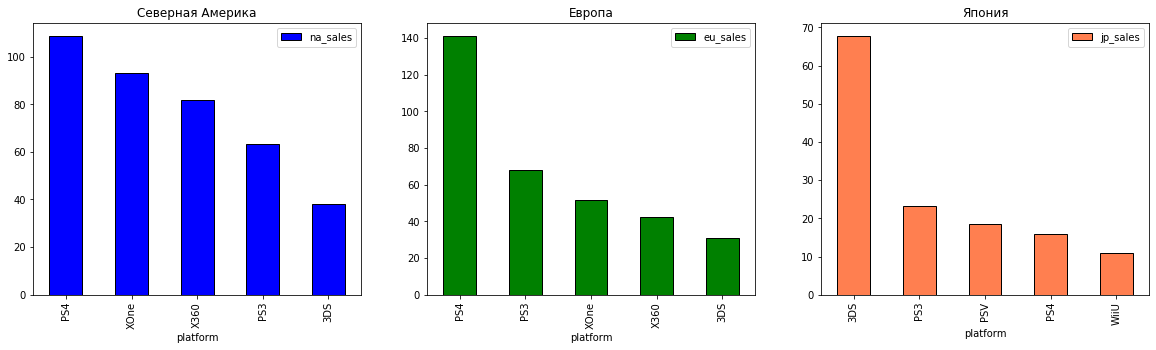

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
data_na.plot(x='platform', y='na_sales', kind='bar', color='blue', ec='black', ax=axes[0], title='Северная Америка')
data_eu.plot(x='platform', y='eu_sales', kind='bar', color='green', ec='black', ax=axes[1], title='Европа')
data_jp.plot(x='platform', y='jp_sales', kind='bar', color='coral', ec='black', ax=axes[2], title='Япония')

Состав топ-5 платформ Северной Америки и Европы идентичен, при этом PS4 самая популярная в обоих регионах и только на 4-м месте в Японии. Завершающая топ-5 платформа в Северной Америке и Европе - 3DS в Японии на первом месте. Похоже у японцев все наоборот).

#### 4.2 Самые популярные жанры (топ-5). Пояснить разницу для каждого региона<a id="step4.2"></a> 

С помощью функции сохраню 3 таблицы по топ жанрам для каждого региона

In [58]:
data_na = top_region(games_actual, 'genre', 'na_sales')
data_eu = top_region(games_actual, 'genre', 'eu_sales')
data_jp = top_region(games_actual, 'genre', 'jp_sales')

Строю гистограммы

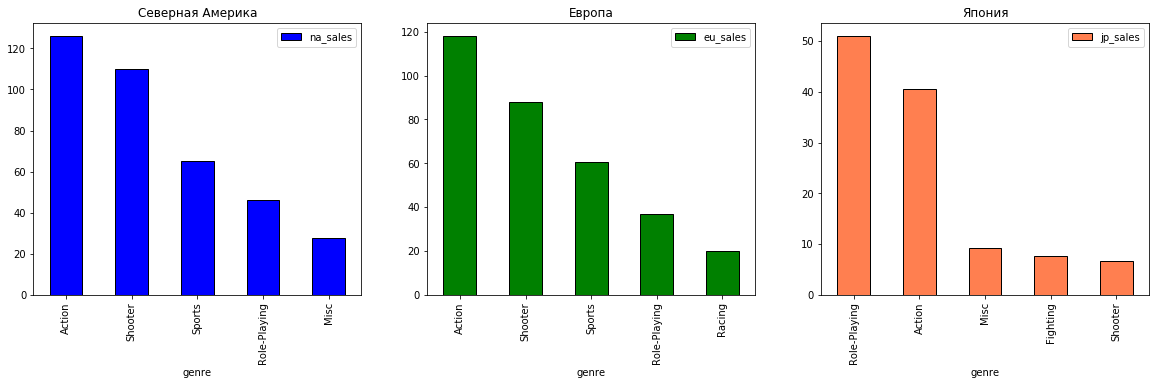

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
data_na.plot(x='genre', y='na_sales', kind='bar', color='blue', ec='black', ax=axes[0], title='Северная Америка')
data_eu.plot(x='genre', y='eu_sales', kind='bar', color='green', ec='black', ax=axes[1], title='Европа')
data_jp.plot(x='genre', y='jp_sales', kind='bar', color='coral', ec='black', ax=axes[2], title='Япония')

Топ-4 Америки и Европы снова идентичен, и даже 3 из них вошли в топ-5 Японии. Предпочтения в Северной Америке и Европе схожи - Action, Sports и Shooter. В Японии предпочтения иные - на первом месте Role-Playing, далее Action с большим отрывом от остальных.

#### 4.3 Влияет ли рейтинг ESRB на продажи в отдельном регионе?<a id="step4.3"></a> 

С помощью функции сохраню 3 таблицы по рейтингам для каждого региона

In [60]:
data_na = top_region(games_actual, 'rating', 'na_sales')
data_eu = top_region(games_actual, 'rating', 'eu_sales')
data_jp = top_region(games_actual, 'rating', 'jp_sales')

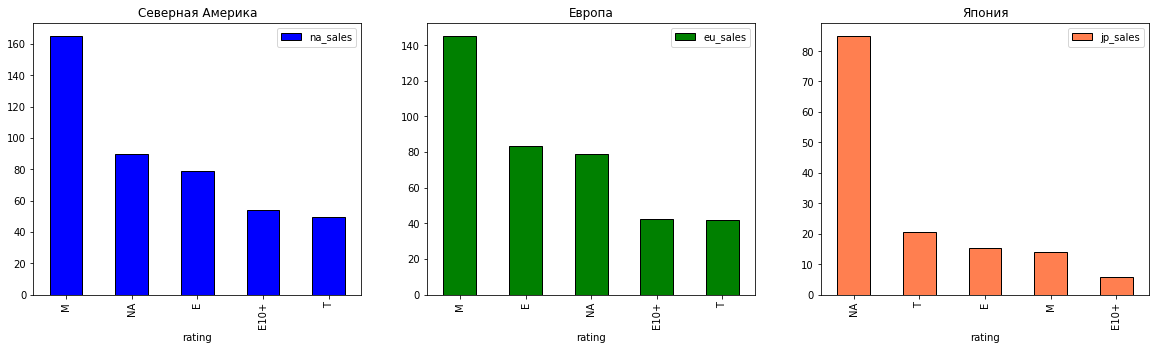

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
data_na.plot(x='rating', y='na_sales', kind='bar', color='blue', ec='black', ax=axes[0], title='Северная Америка')
data_eu.plot(x='rating', y='eu_sales', kind='bar', color='green', ec='black', ax=axes[1], title='Европа')
data_jp.plot(x='rating', y='jp_sales', kind='bar', color='coral', ec='black', ax=axes[2], title='Япония')

И снова Япония кардинально отличается от Северной Америки и Европы. В Японии большая часть продаж приходится на игры без оценки, в то время как В Европе и в Северной Америке лидерами являются игры для взрослых (старше 17 лет). В Америке и Европе следующие по продажам идут игры категории "Для всех", в Японии эти игры на равне с играми категории "для подростков" (старше 13).

### 5. Проверка гипотез<a id="step5"></a> 

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<a id="step5.1"></a> 

H0 - Нулевая гипотеза - Средние пользовательские рейтинги платформ XOne и PC равны.

H1 - Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC не равны.

Критический уровень статистической значимости возьму равным 0.05.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применю метод scipy.stats.ttest_ind.
Вначале сделаю нужные выборки из данных - средние пользовательские рейтинги по платформам.

In [62]:
games_XOne = games.query('platform =="XOne" & user_score != -1')
games_XOne = games_XOne['user_score']
games_PC = games.query('platform =="PC" & user_score != -1')
games_PC = games_PC['user_score']

In [63]:
print('Средняя оценка пользователя платформы XOne: ',pd.Series(games_XOne).mean())
print('Средняя оценка пользователя платформы PC: ',pd.Series(games_PC).mean())
alpha = 0.05

results = st.ttest_ind(games_XOne, games_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаю нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка пользователя платформы XOne:  6.521428571428572
Средняя оценка пользователя платформы PC:  7.065960264900661
p-значение: 1.3037979620149106e-05
Отвергаю нулевую гипотезу


Оценка по двум платформам различается. Исходя только из проверки гипотезы нельзя сказать, чья оценка больше, — можно только сказать, что они отличаются. Но, посчитав среднюю оценку для обоих платформ, можно сказать, что cредняя оценка платформы PC выше, чем средняя оценка платформы XOne.

#### 5.2 Средние пользовательские рейтинги жанров Action и Sports разные<a id="step5.2"></a> 

H0 - Нулевая гипотеза - Средние пользовательские рейтинги жанров Action и Sports равны.

H1 - Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action и Sports не равны.

Критический уровень статистической значимости возьму равным 0.05.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применю метод scipy.stats.ttest_ind.
Вначале сделаю нужные выборки из данных - средние пользовательские рейтинги по жанрам.

In [64]:
games_action = games.query('genre =="Action" & user_score != -1')
games_action = games_action['user_score']
games_sports = games.query('genre =="Sports" & user_score != -1')
games_sports = games_sports['user_score']

In [65]:
print('Средняя оценка пользователя игр жанра Action: ',pd.Series(games_action).mean())
print('Средняя оценка пользовател игр жанра Sports: ',pd.Series(games_sports).mean())
alpha = 0.05

results = st.ttest_ind(games_action, games_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаю нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя оценка пользователя игр жанра Action:  7.058129175946549
Средняя оценка пользовател игр жанра Sports:  6.951433857539316
p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


Оценка пользователей игр жанра Action и Sports не сильно различается. Исходя только из проверки гипотезы можно сказать, что оценка почти одинаковая и входит в диапазон статистической значимости. Но, посчитав среднюю оценку пользователей игр жанра Action и Sports, можно сказать, что оценки почти не отличаются.

### 6. Общие выводы<a id="step6"></a> 

В результате проведенного анализа удалось установить, что развитие игровой индустрии началось в далеком 1995 году, хотя небольшое количество игр было и до этого времени. Сначала количество игр росло плавно и начиная с 2002 года произошел резкий скачок, пик пришелся на 2007-2008 года. После интерес к играм начал снижаться, вследствие чего снизилось количество выпускаемых на рынок новых игр.

Также в результате анализа была получена закономерность, что каждая игровая платформа живет около 10-11 лет. Например, история развития линейки PS: PS - 1994-2003 года, PS2 - 2000-2011 года, PS3 - с 2006-2016. То есть, когда запускается новая версия, предыдущая идет на спад и "умирает". Wii - 2006-2016 года, X360 - 2005-2016, DS реальное развитие начал с 2004 года, завершил в 2013 году. Пиковые значения продаж приходятся примерно на 2-4 года у каждой платформы, после чего начинают угасать. Так у PS3, например, это 2008-2011 года, у PS2 - 2002-2004 года.

В актуальном периоде 2013-2016 года только 2 платформы набирали рост по продажам и лидировали - это платформы PS4 и XOne. Остальные платформы в этом периоде завершали свою жизнь, об этом говорит стремительное падение уровня продаж. В среднем продажи игр платформ PS4 и XOne приносили по 200 тыс долларов.

Оценки критиков и пользователей влияют на продажи по-разному. Зависимости от ценки пользователя не было обнаружено, в то время как слабая зависимость от оценки критика присутствует.

Самый популярный игровой жанр Action. Суммы продаж по нему тоже наибольшие. Самые низкие продажи у жанров Puzzle, Adventure, Strategy, Simulation. По количеству игр жанры Puzzle, Simulation и Strategy также в антитопе.

При сравнении поведения пользователей в разных регионах получилось, что в Северной Америке и Европе вкусы очень схожи, а в Японии отличаются. Это касается и выбора платформ, и жанров игр. В Северной Америке и Европе предпочитают Action, Sports и Shooter. В Японии предпочтения иные - на первом месте Role-Playing.